In [44]:
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [45]:
import pandas as pd
import requests
import io
import zipfile
import itertools

In [46]:
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip", stream=True).content
file = zipfile.ZipFile(io.BytesIO(r))
spam_collection = [message.split('\t') for message in file.read("SMSSpamCollection").decode("utf-8").split("\n")]
Y = [message.pop(0) for message in spam_collection]
Y = Y[0:(len(Y)-1)]
spam_collection = list(itertools.chain.from_iterable(spam_collection))

In [47]:
data =  {'labels': Y, 'messages': spam_collection}

In [48]:
messages_dataframe = pd.DataFrame(data = data)

In [49]:
messages_dataframe['spam'] = messages_dataframe['labels'].map( {'spam': 1, 'ham': 0} ).astype(int)

In [50]:
messages_dataframe.describe()

,spam
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [51]:
messages_dataframe['labels'].value_counts(normalize = True)

ham     0.865985
spam    0.134015
Name: labels, dtype: float64

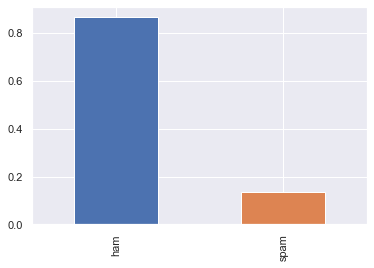

In [52]:
messages_dataframe['labels'].value_counts(normalize = True).plot.bar();

In [53]:
messages_dataframe['length'] = messages_dataframe['messages'].apply(len)
messages_dataframe.head()

,labels,messages,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


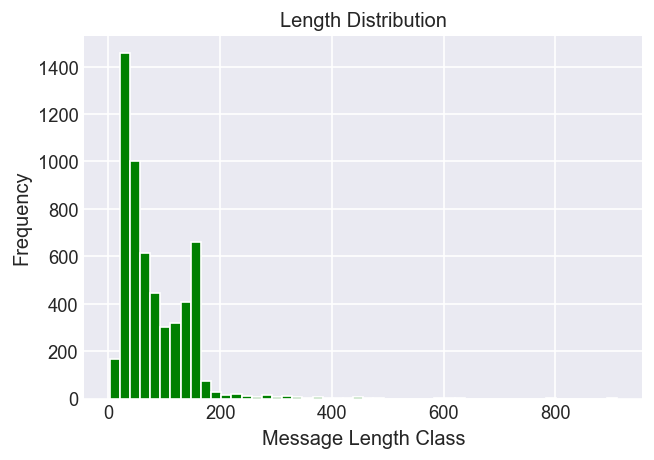

In [54]:
plt.style.use('seaborn-darkgrid')

fig = plt.figure(dpi = 120)
ax = plt.axes()
messages_dataframe['length'].plot(bins=50, kind='hist',ax=ax,color = 'green')
ax.set(xlabel = 'Message Length Class',ylabel = 'Frequency',title = 'Length Distribution');

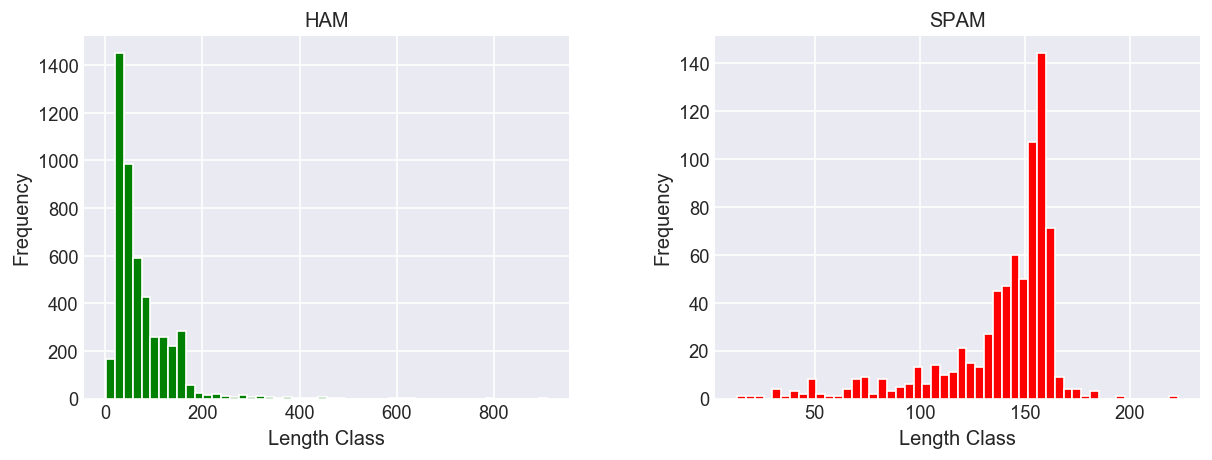

In [55]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

messages_dataframe[messages_dataframe['labels']=='ham'].hist(column='length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'HAM')
messages_dataframe[messages_dataframe['labels']=='spam'].hist(column='length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'SPAM');

In [56]:
most_freq = messages_dataframe['messages'].value_counts().index.tolist()

In [57]:
for mess in most_freq:
    labels_list = messages_dataframe.loc[messages_dataframe['messages']==mess]['labels'].tolist()
    if ['ham','spam'] in labels_list:
        print(mess)
print("there is no same messages in spam and ham")

there is no same messages in spam and ham


In [58]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
def text_process(message):
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word.lower() for word in nopunc.split()]

In [60]:
messages_dataframe['messages'] = messages_dataframe['messages'].apply(text_process)
messages_dataframe.set_index("labels", inplace=True)

In [61]:
from collections import Counter

In [62]:
top_words = Counter(list(itertools.chain.from_iterable(messages_dataframe['messages'])))

In [63]:
pd.DataFrame(top_words.most_common(16),  columns=['word', 'count'])

,word,count
0,to,2251
1,i,2239
2,you,2128
3,a,1442
4,the,1333
5,u,1132
6,and,971
7,is,893
8,in,888
9,me,791


In [64]:
top_words_ham = Counter(list(itertools.chain.from_iterable(messages_dataframe.loc['ham'].messages)))

In [65]:
pd.DataFrame(top_words_ham.most_common(16),  columns=['word', 'count'])

,word,count
0,i,2194
1,you,1841
2,to,1562
3,the,1129
4,a,1064
5,u,985
6,and,849
7,in,815
8,me,761
9,my,747


In [66]:
top_words_spam = Counter(list(itertools.chain.from_iterable(messages_dataframe.loc['spam'].messages)))

In [67]:
pd.DataFrame(top_words_spam.most_common(16),  columns=['word', 'count'])

,word,count
0,to,689
1,a,378
2,call,347
3,you,287
4,your,263
5,free,216
6,the,204
7,for,203
8,now,189
9,or,188


In [68]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usver\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
from copy import deepcopy
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [70]:
lemmitWordNet = lambda message : [lemmatizer.lemmatize(word) for word in message]
stemmitPS = lambda message : [stemmer.stem(word) for word in message]

In [71]:
messages_dataframe['lemmitWordNet'] = messages_dataframe['messages'].apply(lemmitWordNet)
messages_dataframe['stemmitPS'] = messages_dataframe['messages'].apply(stemmitPS)

In [72]:
samples = messages_dataframe.sample(n=8)
print([sample for sample in samples['lemmitWordNet']])
print('—'*50)
print([sample for sample in samples['stemmitPS']])

[['sorry', 'ill', 'call', 'later'], ['thats', 'ok', 'i', 'popped', 'in', 'to', 'ask', 'bout', 'something', 'and', 'she', 'said', 'youd', 'been', 'in', 'are', 'you', 'around', 'tonght', 'wen', 'this', 'girl', 'come'], ['im', 'still', 'pretty', 'weak', 'today', 'bad', 'day'], ['had', 'your', 'mobile', '11', 'month', 'or', 'more', 'u', 'r', 'entitled', 'to', 'update', 'to', 'the', 'latest', 'colour', 'mobile', 'with', 'camera', 'for', 'free', 'call', 'the', 'mobile', 'update', 'co', 'free', 'on', '08002986030'], ['this', 'pain', 'couldnt', 'have', 'come', 'at', 'a', 'worse', 'time'], ['why', 'you', 'keeping', 'me', 'away', 'like', 'this'], ['it', 'ok', 'i', 'wun', 'b', 'angry', 'msg', 'u', 'aft', 'i', 'come', 'home', 'tonight'], ['cashbincouk', 'get', 'lot', 'of', 'cash', 'this', 'weekend', 'wwwcashbincouk', 'dear', 'welcome', 'to', 'the', 'weekend', 'we', 'have', 'got', 'our', 'biggest', 'and', 'best', 'ever', 'cash', 'give', 'away', 'these']]
————————————————————————————————————————————

In [73]:
def remove_stopwords(message):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    return [word for word in message if word not in STOPWORDS]

In [74]:
messages_dataframe['lemmitWordNet'] = messages_dataframe['lemmitWordNet'].apply(remove_stopwords)

In [75]:
top_words_ham = Counter(list(itertools.chain.from_iterable(messages_dataframe.loc['ham'].lemmitWordNet)))
pd.DataFrame(top_words_ham.most_common(16),  columns=['word', 'count'])

,word,count
0,get,314
1,go,276
2,ltgt,276
3,ok,273
4,come,245
5,call,243
6,know,241
7,ill,238
8,like,234
9,got,232


In [76]:
top_words_spam = Counter(list(itertools.chain.from_iterable(messages_dataframe.loc['spam'].lemmitWordNet)))
pd.DataFrame(top_words_spam.most_common(16),  columns=['word', 'count'])

,word,count
0,call,359
1,free,216
2,txt,150
3,text,137
4,mobile,135
5,claim,115
6,stop,115
7,reply,102
8,prize,94
9,get,83


In [77]:
X = messages_dataframe['lemmitWordNet']
Y = messages_dataframe['spam']

## Naive Bayes

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, stratify = Y)

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [116]:
%%time
def dummy(doc):
    return doc

pipe = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

Wall time: 98 ms


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function dummy at 0x000002D0...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [117]:
y_pred = pipe.predict(X_test)

In [118]:
metrics.accuracy_score(y_test, y_pred)

0.9634146341463414

In [121]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [120]:
cnf_matrix

array([[1207,    0],
       [  51,  136]], dtype=int64)

In [90]:
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

In [91]:
y_pred_proba

array([0.00263622, 0.05237409, 0.08323103, ..., 0.09388543, 0.04966697,
       0.00853597])

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
p, r, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [99]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, y_scores, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg      1145        62
pos        12       175


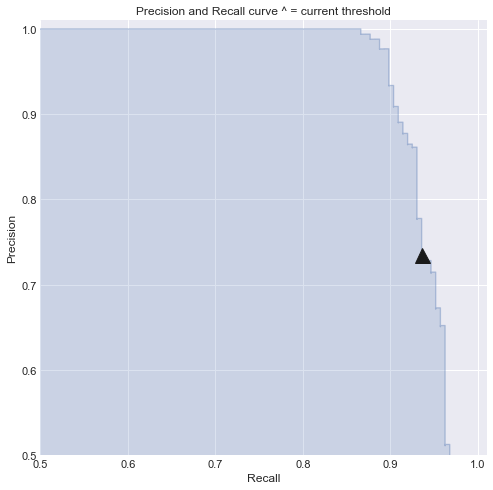

In [106]:
precision_recall_threshold(p, r, y_pred_proba, thresholds, 0.1)

In [107]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

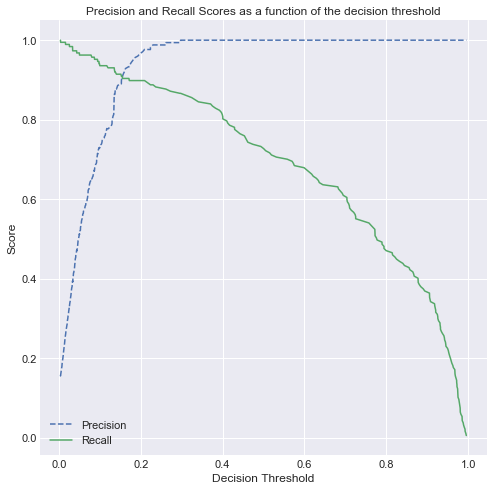

In [108]:
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9847281233801046


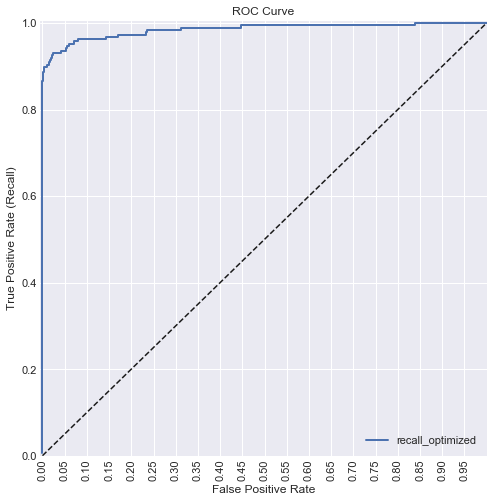

In [127]:
fpr, tpr, auc_thresholds = metrics.roc_curve(y_test, y_pred_proba)
print(metrics.auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [131]:
x0 = 0.5

In [132]:
import scipy

     pred_neg  pred_pos
neg      1207         0
pos        51       136


TypeError: 'NoneType' object is not callable

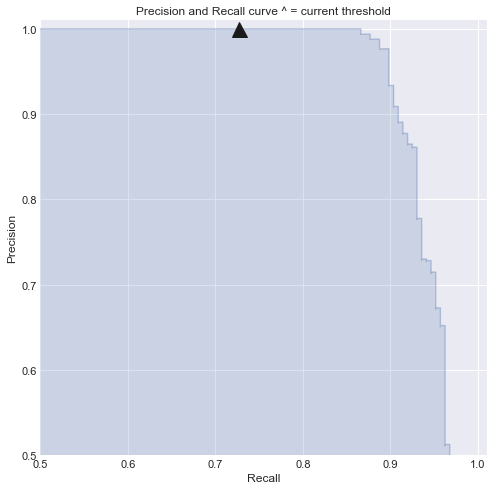

In [137]:
scipy.optimize.fmin(precision_recall_threshold(p, r, y_pred_proba, thresholds), x0)

### Przy zalożeniu ze podany classyfikator działa automatycznie powinniszmy minimalizować bląd False Positive ponieważ nie chcemy żeby klasyfikator odżucał powiadomienia od innych użytkowników.

## Dummy Classifier

In [79]:
from sklearn.dummy import DummyClassifier

In [80]:
pipe_dummy = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)), 
                 ('tfid', TfidfTransformer()),  
                 ('model', DummyClassifier())])
pipe_dummy.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function dummy at 0x0000016C...use_idf=True)), ('model', DummyClassifier(constant=None, random_state=None, strategy='stratified'))])

In [81]:
y_pred_class = pipe_dummy.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:227: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  k in range(self.n_outputs_)).T


In [82]:
metrics.accuracy_score(y_test, y_pred_class)

0.7704447632711621

In [83]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1051,  156],
       [ 164,   23]], dtype=int64)

## Logistic Regression Classifier

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
pipe_logreg = Pipeline([('bow', CountVectorizer(tokenizer=dummy, preprocessor=dummy)), 
                 ('tfid', TfidfTransformer()),  
                 ('model', LogisticRegression(solver='liblinear'))])
pipe_logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function dummy at 0x0000016C...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [86]:
y_pred_class = pipe_logreg.predict(X_test)

In [87]:
metrics.accuracy_score(y_test, y_pred_class)

0.9576757532281205

In [88]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1206,    1],
       [  58,  129]], dtype=int64)